In [0]:
!pip install face_recognition
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
def encode_images():
  # grab the paths to the input images in our dataset
  path = "/content/drive/My Drive/core_project/Data/Trained"
  print("[INFO] quantifying faces...")
  imagePaths = list(paths.list_images(path))
  print(imagePaths)
  # initialize the list of known encodings and known names
  knownEncodings = [] 
  knownNames = []
  for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    print("[INFO] processing image {}/{}".format(i + 1,
      len(imagePaths)))
    name = imagePath.split(os.path.sep)[-2]

    # load the input image and convert it from RGB (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input image
    boxes = face_recognition.face_locations(rgb,
      model= "hog")

    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)

    # loop over the encodings
    for encoding in encodings:
      # add each encoding + name to our set of known names and
      # encodings
      knownEncodings.append(encoding)
      knownNames.append(name)
  print("[INFO] serializing encodings...")
  data = {"encodings": knownEncodings, "names": knownNames}
  f = open("/content/drive/My Drive/core_project/encodings.pickle", "wb")
  f.write(pickle.dumps(data))
  f.close()
encode_images()

[INFO] quantifying faces...
['/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/0.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/144.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/11.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/12.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/13.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/10.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/1.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/15.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/14.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/133.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/155.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/18.jpg', '/content/drive/My Drive/core_project/Data/Trained/Abhilash_A/150.jpg', '/content/drive/My Drive/core_project/Data/Tra

KeyboardInterrupt: ignored

In [0]:
# extract and plot each detected face in a photograph
!pip install mtcnn
%tensorflow_version 1.x
# face detection with mtcnn on a photograph
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image
import os
import time
count = 1
def just_crop(filename, result_list, fp):
	global count
	fp = fp + "data"
	try:
		os.mkdir(fp)
	except:
		print("already created")
	data = Image.open(filename)
	x1, y1, width, height = result_list[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = data.crop((x1,y1,x2,y2))
	s = fp + "/" + str(count) + ".jpg"
	face.save(s)
	count = count+1
	
# draw each face separately
def extract_faces(filename, result_list):
	# load the image
	try:
		os.mkdir(filename[:-4])
	except:
		print(" ")
	data = Image.open(filename)
	# plot each face as a subplot
	j = 1
	faces = []
	for i in range(len(result_list)):
		# get coordinates
		# print(result_list[i])
		x1, y1, width, height = result_list[i]['box']
		if(width < 0 and height < 0):
			continue
		x2, y2 = x1 + width, y1 + height
		# define subplot
		face = data.crop((x1,y1,x2,y2))
		print(x1,y1,x2,y2)
		s = filename[:-4] + "/" + str(j) + ".jpg"
		face.save(s)
		j = j+1
		faces.append((y1,x2,y2,x1))
	return faces
	# 	pyplot.subplot(1, len(result_list), i+1)
	# 	pyplot.axis('off')
	# 	# plot face
	# 	pyplot.imshow(data[y1:y2, x1:x2])
	# # show the plot
	# pyplot.show()
def mtcnn_detection(filename,fp):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	faces = detector.detect_faces(pixels)
	# display faces on the original image
	extract_faces(filename, faces)
	# try:
	# 	just_crop(filename,faces,fp)
	# except:
	# 	print("This image can be deleted" + filename)

fp = "/content/drive/My Drive/core_project/Data/Test/"
fn = input("enter your file name inside test folder")
faces = mtcnn_detection(fp+fn,fp)
# this is only for data finding face in an image
# for f in os.walk(fp):
# 	print("true1")
# 	for file in f:
# 		print("true2")
# 		if (type(file) == list and len(file) > 1):
# 			print("true3")
# 			for each in file:
# 				filename = fp + each
# 				print(filename)
# 				mtcnn_detection(filename,fp)

enter your file name inside test foldertest4.jpg
 
762 98 834 190
34 207 121 305
261 277 347 380
585 245 678 355
710 240 807 347
986 138 1174 405
337 168 414 259
105 488 220 629
228 153 299 233
102 154 164 230
865 246 1005 398
483 213 571 314
-7 307 96 435
415 316 507 429


enter your file name inside test foldermainn.jpg










 
{'gopi', 'byri_varun', 'Unknown', 'praveen_polinati', 'Phaneendra'}


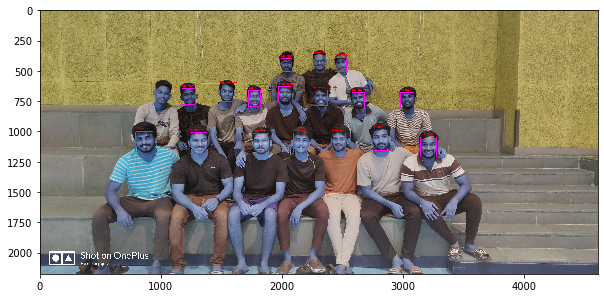

In [3]:
!pip install face_recognition
import face_recognition
import pickle
import cv2
!pip install mtcnn
%tensorflow_version 1.x
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image
import os
%matplotlib inline
fig = plt.figure(figsize=(10,10))
def extract_faces(filename, result_list):
	try:
		os.mkdir(filename[:-4])
	except:
		print(" ")
	data = Image.open(filename)
	j = 1
	faces = []
	for i in range(len(result_list)):
		# get coordinates
		# print(result_list[i])
		x1, y1, width, height = result_list[i]['box']
		if(width < 20 and height < 20):
			continue
		x2, y2 = x1 + width, y1 + height
		# define subplot
		face = data.crop((x1,y1,x2,y2))
		# print(x1,y1,x2,y2)
		s = filename[:-4] + "/" + str(j) + ".jpg"
		face.save(s)
		j = j+1
		faces.append((y1,x2,y2,x1))
	return faces
	# 	pyplot.subplot(1, len(result_list), i+1)
	# 	pyplot.axis('off')
	# 	# plot face
	# 	pyplot.imshow(data[y1:y2, x1:x2])
	# # show the plot
	# pyplot.show()
def mtcnn_detection(filename,fp):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	faces = detector.detect_faces(pixels)
	return extract_faces(filename, faces)
	# try:
	# 	just_crop(filename,faces,fp)
	# except:
	# 	print("This image can be deleted" + filename)
data = pickle.loads(open("/content/drive/My Drive/core_project/encodings.pickle", "rb").read())
# path = "/content/drive/My Drive/core_project/Data/Test/"
# filename = path + input("enter your file name here: ")
fp = "/content/drive/My Drive/core_project/Data/Test/"
fn = input("enter your file name inside test folder")
boxes = mtcnn_detection(fp+fn,fp)
image = cv2.imread(fp+fn)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
encodings = face_recognition.face_encodings(rgb, boxes)

names = []

for encoding in encodings:
	matches = face_recognition.compare_faces(data["encodings"],
		encoding,0.4)
	name = "Unknown"
	if True in matches:
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
		name = max(counts, key=counts.get)
	names.append(name)
print(set(names))
for ((top, right, bottom, left), name) in zip(boxes, names):
	cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 255), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.75, (255, 0, 0), 2)
s = fp+"out.jpg"
im = Image.fromarray(image)
im.save(s)
image = plt.imshow(image)

In [0]:
!pip install face_recognition
import face_recognition
import os
# Load the jpg files into numpy arrays
# biden_image = face_recognition.load_image_file("biden.jpg")
# obama_image = face_recognition.load_image_file("obama.jpg")
unknown_image = face_recognition.load_image_file("/content/drive/My Drive/core_project/1/3.jpg")
known_image = face_recognition.load_image_file("/content/drive/My Drive/core_project/1/2.jpg")


path = "/content/drive/My Drive/core_project/test/occlusions/"
for f in os.walk(path):
  for file in f:
    if (type(file) == list and len(file) > 0):
      for each in file:
        filename = path + each
        print(filename)
        try:
          img =  face_recognition.load_image_file(filename)
          img = face_recognition.face_encodings(img)[0]
        except:
          os.remove(filename)


# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
# try:
#     # biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
#     # obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
#     known_face_encoding = face_recognition.face_encodings(known_image)[0]
#     unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
# except IndexError:
#     print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
#     quit()

# print(type(unknown_face_encoding))
# print(unknown_face_encoding.size)
# known_faces = [
#     known_face_encoding
# ]

# # # results is an array of True/False telling if the unknown face matched anyone in the known_faces array
# results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

# print("Is the unknown face a picture of Biden? {}".format(results[0]))
# # print("Is the unknown face a picture of Obama? {}".format(results[1]))
# print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

/content/drive/My Drive/core_project/test/occlusions/1.jpg
/content/drive/My Drive/core_project/test/occlusions/2.jpg
/content/drive/My Drive/core_project/test/occlusions/3.jpg
/content/drive/My Drive/core_project/test/occlusions/4.jpg
/content/drive/My Drive/core_project/test/occlusions/5.jpg
/content/drive/My Drive/core_project/test/occlusions/6.jpg
/content/drive/My Drive/core_project/test/occlusions/7.jpg
/content/drive/My Drive/core_project/test/occlusions/8.jpg
/content/drive/My Drive/core_project/test/occlusions/9.jpg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
